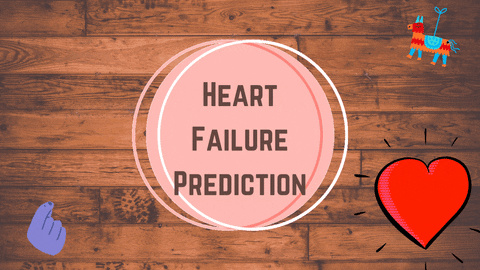

Cardiovascular diseases (CVDs) are the leading cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs, and this dataset contains 12 features that can be used to predict mortality from heart failure.


Most CVDs can be prevented by addressing behavioral risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity, and harmful use of alcohol. These can be addressed through population-wide strategies.


People with CVD or who are at high CVD risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidemia, or already established disease) need early detection and management. Machine learning models can be of great help in this regard.

## About the data (Description of attributes)

**age**: Age of the patient


**anaemia**: Haemoglobin level of patient (Boolean)


**eatinine_phosphokinase**Level of the CPK enzyme in the blood (mcg/L)


**diabetes**: If the patient has diabetes (Boolean)


**ejection_fraction**: Percentage of blood leaving the heart at each contraction


**high_blood_pressure**: If the patient has hypertension (Boolean)


**platelets**: Platelet count of blood (kiloplatelets/mL)


**serum_creatinine**: Level of serum creatinine in the blood (mg/dL)


**serum_sodium**: Level of serum sodium in the blood (mEq/L)


**sex**: Sex of the patient


**smoking**: If the patient smokes or not (Boolean)


**time**: Indicates the number of days after a patient is admitted that he or she will die.


**DEATH_EVENT**: If the patient deceased during the follow-up period (Boolean)


**[Attributes having Boolean values: 0 = Negative (No); 1 = Positive (Yes)]**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape

(299, 13)

In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.isna().sum()/len(df)*100

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**1) Age**:

* The mean age of the patients is around 60.83 years.


* The age ranges from a minimum of 40 years to a maximum of 95 years.


* The majority of patients (50%) have an age around 60 years.


**2) Anaemia**:


* About 43% of patients have anaemia (1 indicates presence, 0 indicates absence).


**3) Creatinine Phosphokinase**:


* The mean value of creatinine phosphokinase is approximately 581.84.


* The values vary widely, with a minimum of 23 and a maximum of 7861.


* The majority of patients have values below 582.


**4) Diabetes**:


* Around 42% of patients have diabetes (1 indicates presence, 0 indicates absence).


**5) Ejection Fraction**:


* The mean ejection fraction is about 38.08.


* The ejection fraction values range from a minimum of 14 to a maximum of 80.


* Ejection fraction measures the percentage of blood leaving the heart with each contraction. Lower values might indicate heart dysfunction.


**6) High Blood Pressure**:


* About 35% of patients have high blood pressure (1 indicates presence, 0 indicates absence).


**7) Platelets**:


* The mean platelet count is approximately 263358.03.


* Platelet counts vary, with a minimum of 25100 and a maximum of 850000.


* The majority of patients have platelet counts around 262000.


**8) Serum Creatinine**:


* The mean serum creatinine level is about 1.39.


* Serum creatinine levels vary from a minimum of 0.5 to a maximum of 9.4.


**9) Serum Sodium**:


* The mean serum sodium level is around 136.63.


* Serum sodium levels vary, with a minimum of 113 and a maximum of 148.


**10) Sex**:
 
 
* About 65% of patients are male (0 indicates female, 1 indicates male).


**11) Smoking**:


* Around 32% of patients are smokers (1 indicates smoking, 0 indicates non-smoking).


**12) Time**:

* The time variable appears to represent a certain time interval.


* It ranges from a minimum of 4 to a maximum of 285.


**13) Death Event**:


* About 32% of patients have experienced a death event (1 indicates death, 0 indicates survival).

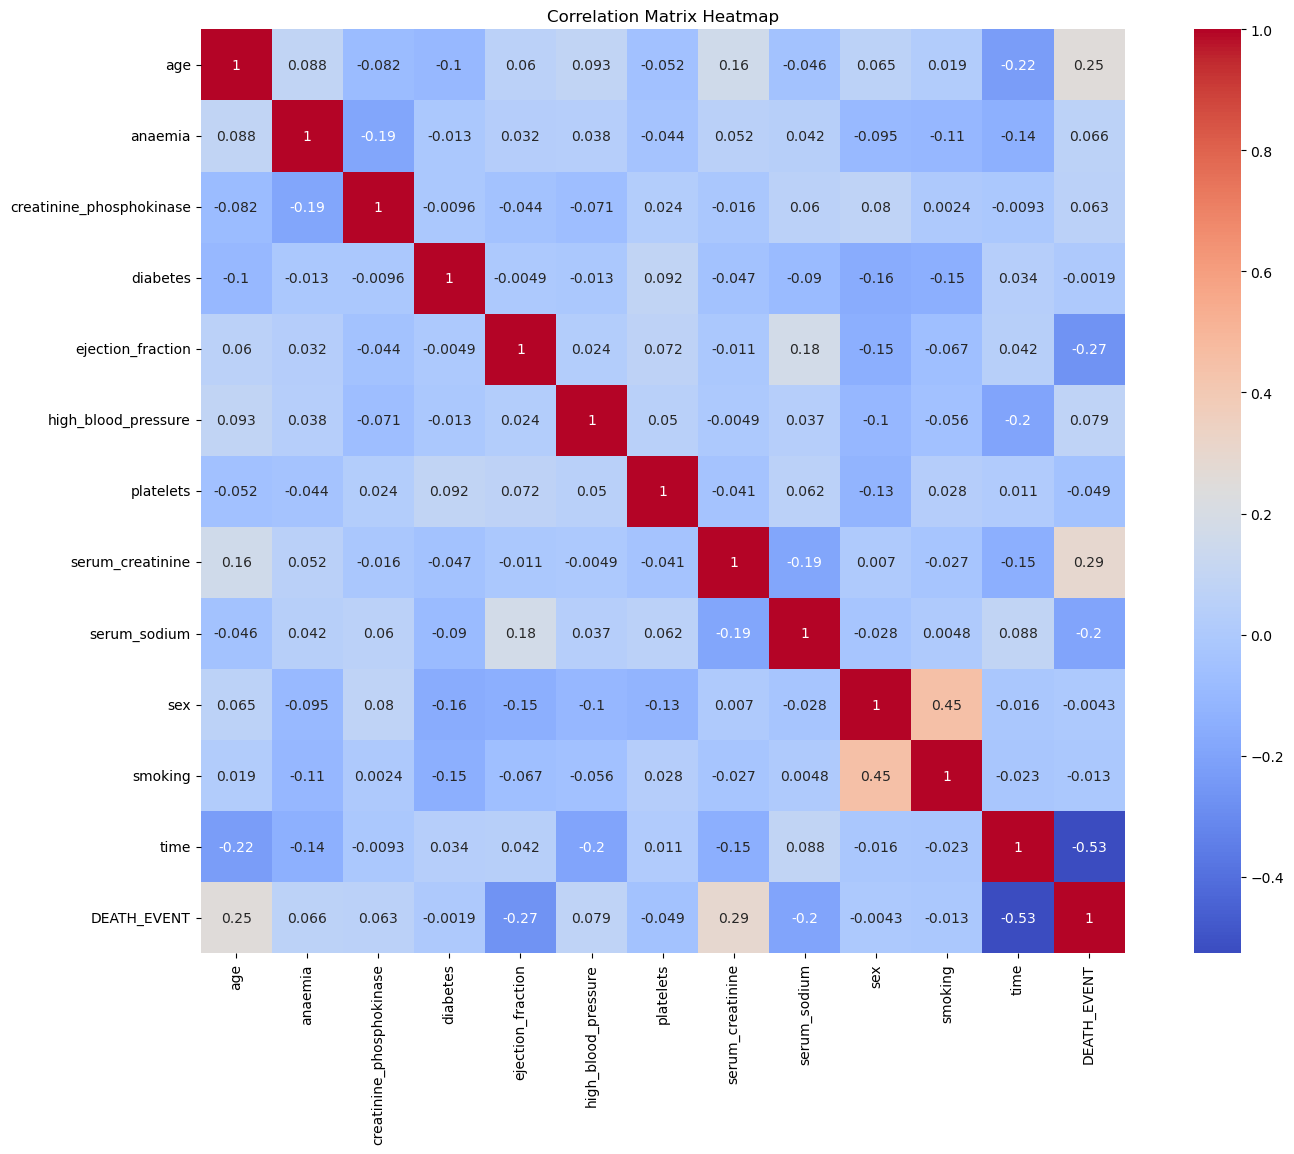

In [9]:
#checking correlation between variables

corr_matrix = df.corr()
plt.figure(figsize=(18,12)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


**1) Age and Death Event**:


* Age is positively correlated with the Death Event variable (0.253729), suggesting that older patients might have a higher likelihood of experiencing a death event.


**2) Ejection Fraction and Death Event**:

* Ejection fraction is negatively correlated with the Death Event variable (-0.268603). This indicates that a lower ejection fraction might be associated with a higher likelihood of a death event. A lower ejection fraction is often linked to heart dysfunction.


**3) Serum Creatinine and Death Event**:

* Serum creatinine is positively correlated with the Death Event variable (0.294278), suggesting that higher serum creatinine levels might be associated with an increased risk of death events. Elevated serum creatinine levels can indicate kidney dysfunction, which could contribute to worse outcomes.


**4) Time and Death Event**:

* Time is negatively correlated with the Death Event variable (-0.526964). This might indicate that the longer the follow-up time, the lower the likelihood of a death event. This could be due to patients with shorter follow-up times having a higher likelihood of experiencing an event.


**5) Sex and Smoking**:


* There is a moderate positive correlation between Sex and Smoking (0.445892). This suggests that a higher proportion of males might be associated with a higher proportion of smokers in the dataset.


**6) Serum Sodium and Ejection Fraction**:

* There is a positive correlation between Serum Sodium and Ejection Fraction (0.175902). This indicates that patients with higher serum sodium levels might also have higher ejection fractions.


**7) Age and Time**:


* Age is negatively correlated with Time (-0.224068), implying that older patients might have shorter follow-up times.


**8) Anaemia and Creatinine Phosphokinase**:


* There is a negative correlation between Anaemia and Creatinine Phosphokinase (-0.190741). This suggests that patients with anaemia might have slightly lower creatinine phosphokinase levels.


**9) Diabetes and Serum Sodium**:

* Diabetes is negatively correlated with Serum Sodium (-0.089551). This implies that patients with diabetes might have slightly lower serum sodium levels.

**All variables have the correct data type, meaning there are no suspicious values or typos present.**


**The dataset does not contain any null or duplicate values. This indicates that the dataset is clean.**

# Identifying and Treating Outliers: IQR Method

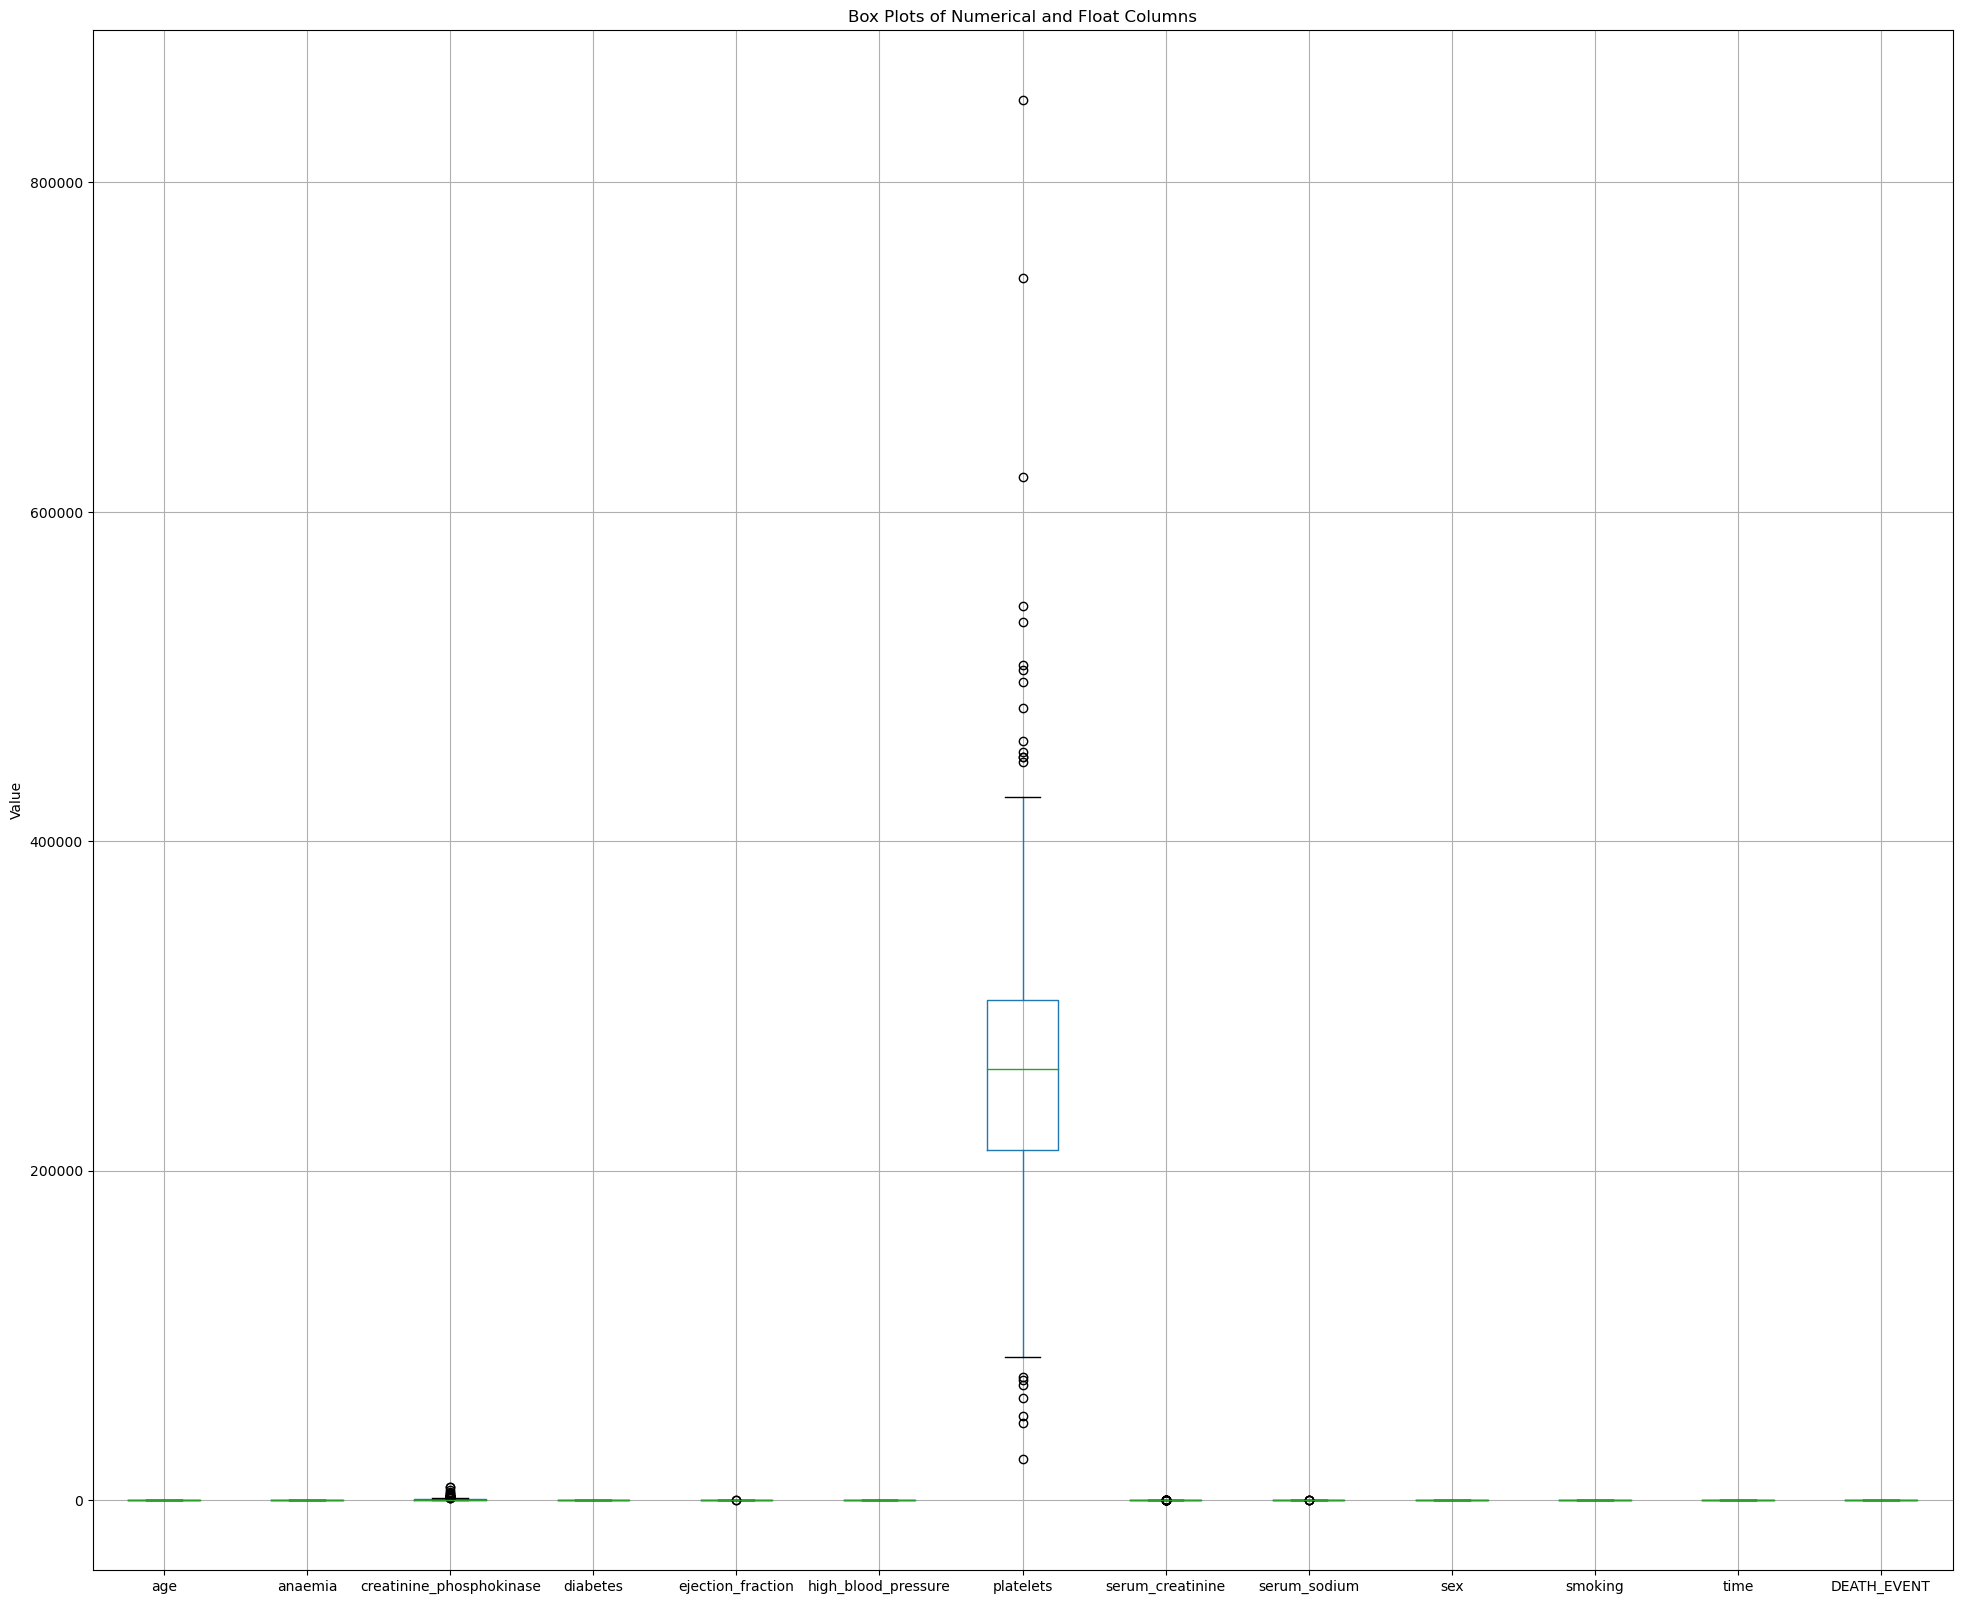

In [11]:
plt.figure(figsize=(24,20)) #(width,height)
df.boxplot()
plt.title('Box Plots of Numerical and Float Columns')
plt.ylabel('Value')
plt.show()

**The "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium" columns in the dataset contains many outliers. Since the dataset only has 300 records, I used the Z-score method to remove outliers instead of the IQR method, which would have removed too many records.**

# Identifying and Treating Outliers: Z-Score Method

In [12]:
# Calculate z-scores for the entire DataFrame

z_scores = np.abs((df - df.mean()) / df.std())
z_scores.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.190949,0.869647,0.000165,0.846161,1.527998,1.356997,1.678834e-02,0.489237,1.501519,0.734457,0.686531,1.626775,1.451727
1,0.490457,0.869647,7.502063,0.846161,0.007065,0.734457,7.523047e-09,0.284076,0.141739,0.734457,0.686531,1.601007,1.451727
2,0.350246,0.869647,0.449186,0.846161,1.527998,0.734457,1.036336e+00,0.090748,1.728149,0.734457,1.451727,1.588122,1.451727
3,0.910808,1.146046,0.485257,0.846161,1.527998,0.734457,5.455595e-01,0.489237,0.084892,0.734457,0.686531,1.588122,1.451727
4,0.350246,1.146046,0.434757,1.177856,1.527998,0.734457,6.507077e-01,1.262550,4.674340,1.356997,0.686531,1.575238,1.451727


In [13]:
# Identify outliers based on z-scores greater than 3 or less than -3

threshold = 3
outlier_rows = z_scores[(z_scores > threshold).any(axis=1)]
outlier_rows

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,0.490457,0.869647,7.502063,0.846161,0.007065,0.734457,7.523047e-09,0.284076,0.141739,0.734457,0.686531,1.601007,1.451727
4,0.350246,1.146046,0.434757,1.177856,1.527998,0.734457,6.507077e-01,1.262550,4.674340,1.356997,0.686531,1.575238,1.451727
9,1.611300,1.146046,0.472890,0.846161,0.260554,1.356997,1.274403e+00,7.739045,0.821629,0.734457,1.451727,1.549470,1.451727
19,1.078949,1.146046,0.000165,1.177856,1.429372,0.734457,1.803174e+00,0.489237,3.541189,1.356997,0.686531,1.485049,1.451727
28,0.238246,1.146046,0.537819,0.846161,0.007065,0.734457,1.128356e+00,4.259137,0.594999,0.734457,0.686531,1.343322,1.451727
52,0.070106,0.869647,3.485729,1.177856,2.020846,0.734457,7.523047e-09,5.225778,2.124562,1.356997,0.686531,1.124290,1.451727
60,1.331160,0.869647,7.338194,1.177856,1.105517,1.356997,1.294852e+00,0.380740,0.538152,0.734457,0.686531,0.905258,1.451727
64,1.331160,0.869647,0.000165,0.846161,3.541779,0.734457,7.523047e-09,0.206745,0.084892,1.356997,0.686531,0.866605,0.686531
72,2.031652,0.869647,5.462462,0.846161,0.260554,0.734457,2.081508e-01,0.380740,1.048259,0.734457,1.451727,0.750647,1.451727
103,1.583371,0.869647,4.768853,0.846161,0.683035,0.734457,3.819674e-01,0.380740,0.764782,0.734457,1.451727,0.557383,0.686531


In [14]:
outlier_rows.shape

(19, 13)

In [15]:
#dropping outliers

df = df.drop(outlier_rows.index)

In [16]:
df.shape

(280, 13)

**There were 19 outliers present in the data, and 6.4% of the data was lost when the outliers were removed.**

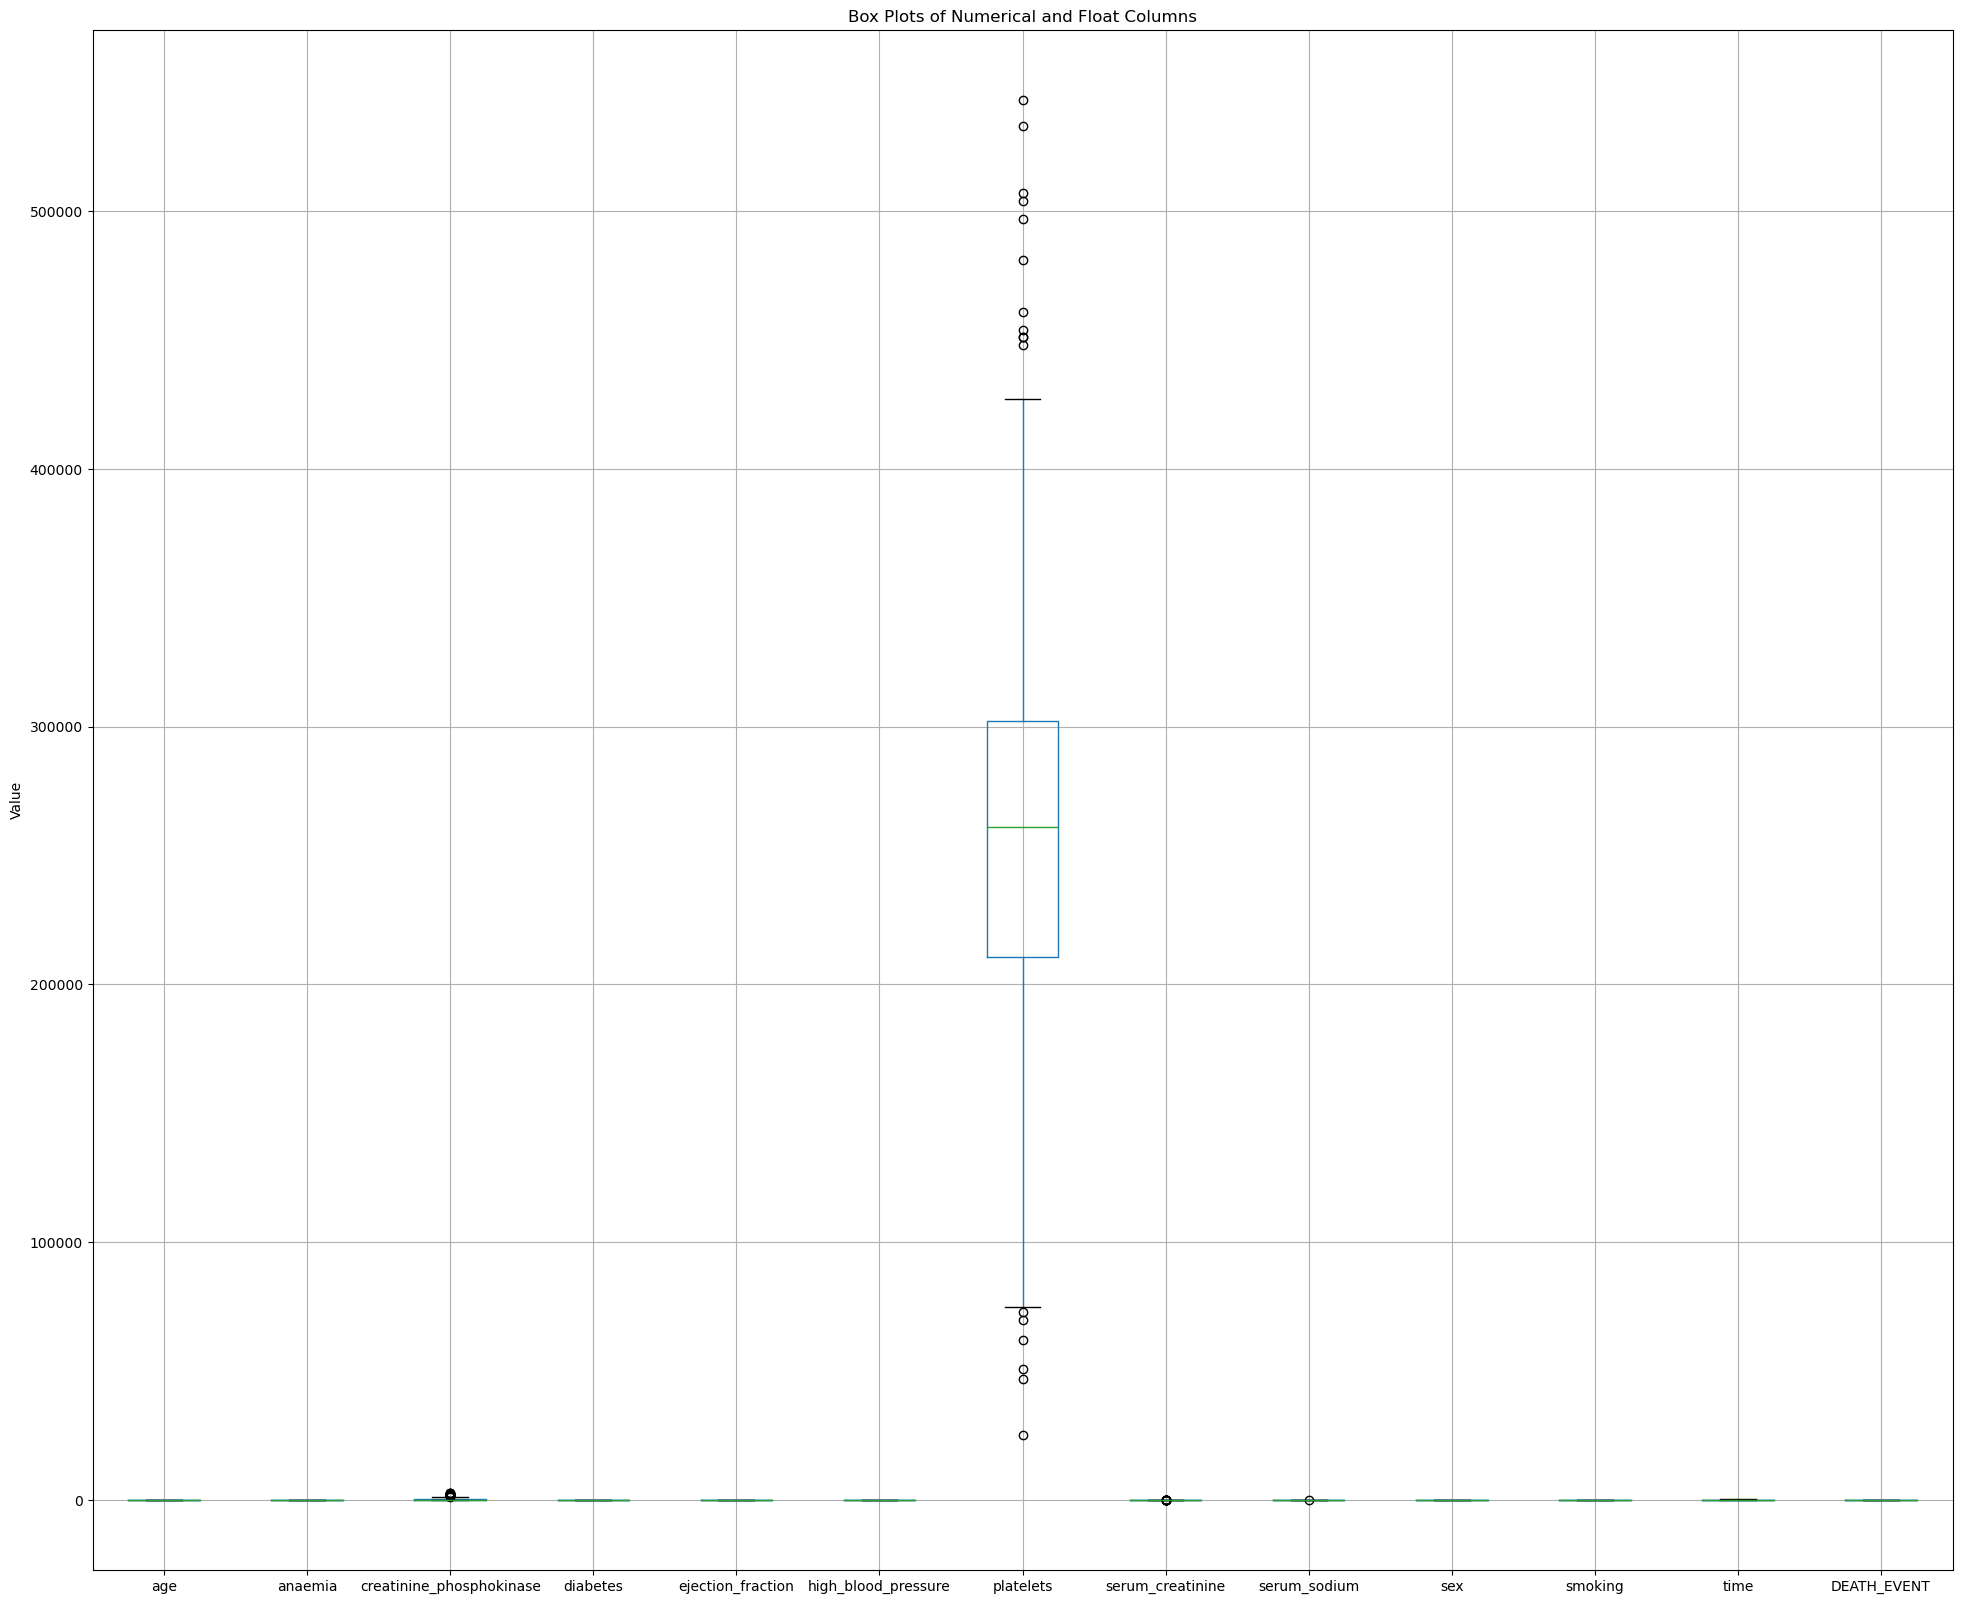

In [17]:
plt.figure(figsize=(24,20)) #(width,height)
df.boxplot()
plt.title('Box Plots of Numerical and Float Columns')
plt.ylabel('Value')
plt.show()

**All the outliers are removed successfully.**

In [18]:
# make a copy of dataset.

df_copy = df.copy()

# Feature Engineering

**Feature Encoding is not required becuase all variables are already in numerical form.**

## Checking Distribution of data

In [19]:
df.shape

(280, 13)

In [20]:
# Select appropriate bin size using sturges_rule

import math

def sturges_rule(num_data_points):
    k = 1 + math.log2(num_data_points)
    return int(k)

# Example usage
num_data_points = 280
bins = sturges_rule(num_data_points)
print("Number of bins according to Sturges' Rule:", bins)

Number of bins according to Sturges' Rule: 9


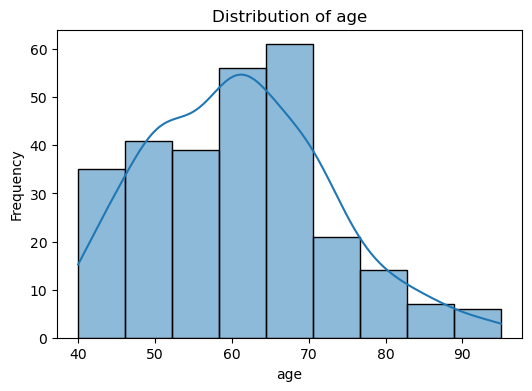

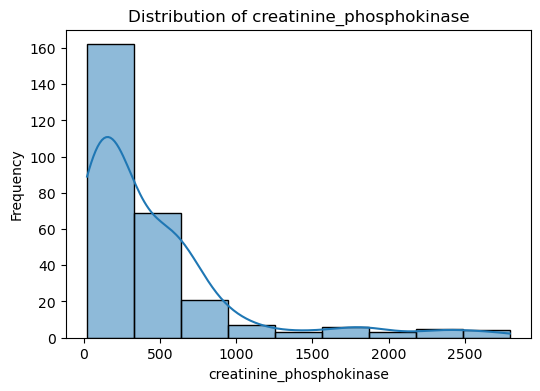

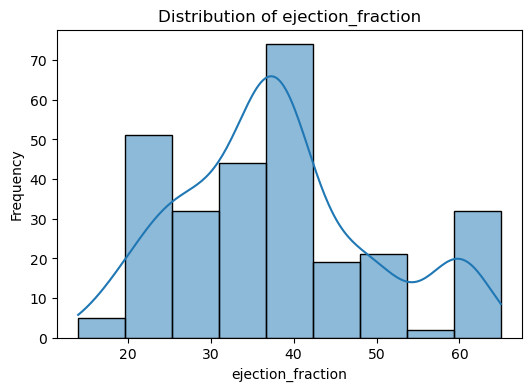

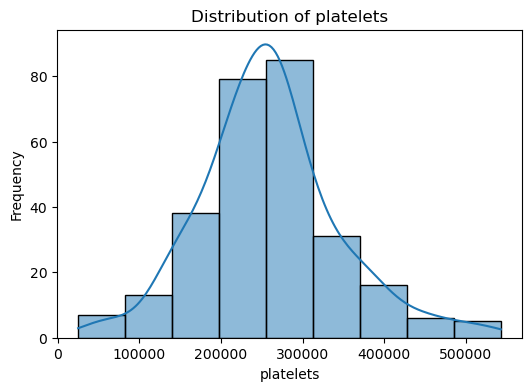

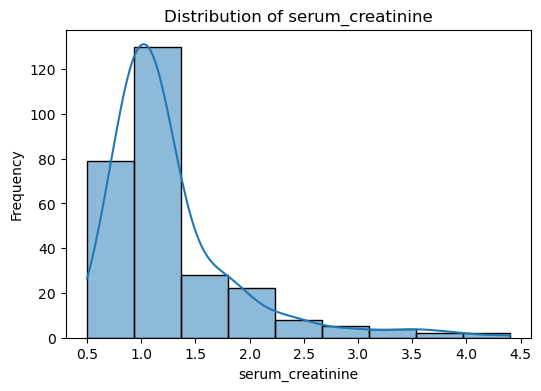

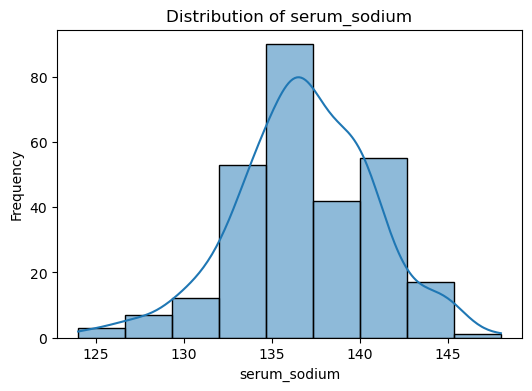

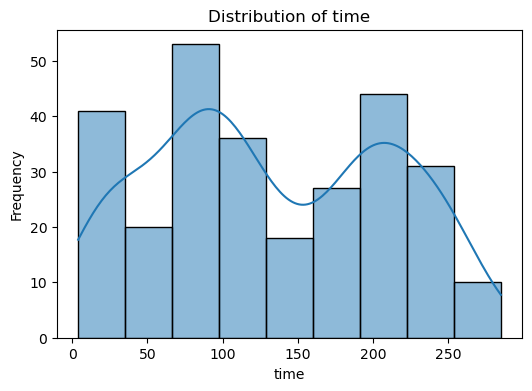

In [21]:
# check distribution of all continuous variables
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude binary variables from the list
binary_vars = [var for var in continuous_vars if df[var].nunique() == 2]

# Exclude binary variables from the continuous variables
continuous_vars = [var for var in continuous_vars if var not in binary_vars]

# Plot the distribution of each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, bins=9, kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

In [22]:
# check skewness of all continuous variables

df[continuous_vars].skew()

age                         0.414871
creatinine_phosphokinase    2.338953
ejection_fraction           0.420675
platelets                   0.457111
serum_creatinine            2.298252
serum_sodium               -0.232614
time                        0.088890
dtype: float64

**Approximately Symmetric (skewness between -0.5 and 0.5)**:


Serum Sodium (skewness: -0.232614)


Time (skewness: 0.088890)



Age (skewness: 0.414871)


Ejection Fraction (skewness: 0.420675)


Platelets (skewness: 0.457111)


**Highly Skewed (skewness greater than 1 or less than -1)**:




Creatinine Phosphokinase (skewness: 2.338953)


Serum Creatinine (skewness: 2.298252)

-------------

**All variable has approximate symmetric distribution except two variables**:




**Creatinine Phosphokinase (2.338953)**:

A positive skewness of this magnitude suggests that the distribution is highly skewed to the right, with a few extremely high values pulling the distribution in that direction.


**Serum Creatinine (2.298252)**:


Similar to creatinine phosphokinase, this variable also has a highly positive skewed distribution. It is possible that there are some extremely high serum creatinine values that are pulling the distribution to the right.

# Check colinearity between variables to avoid model from overfitting.

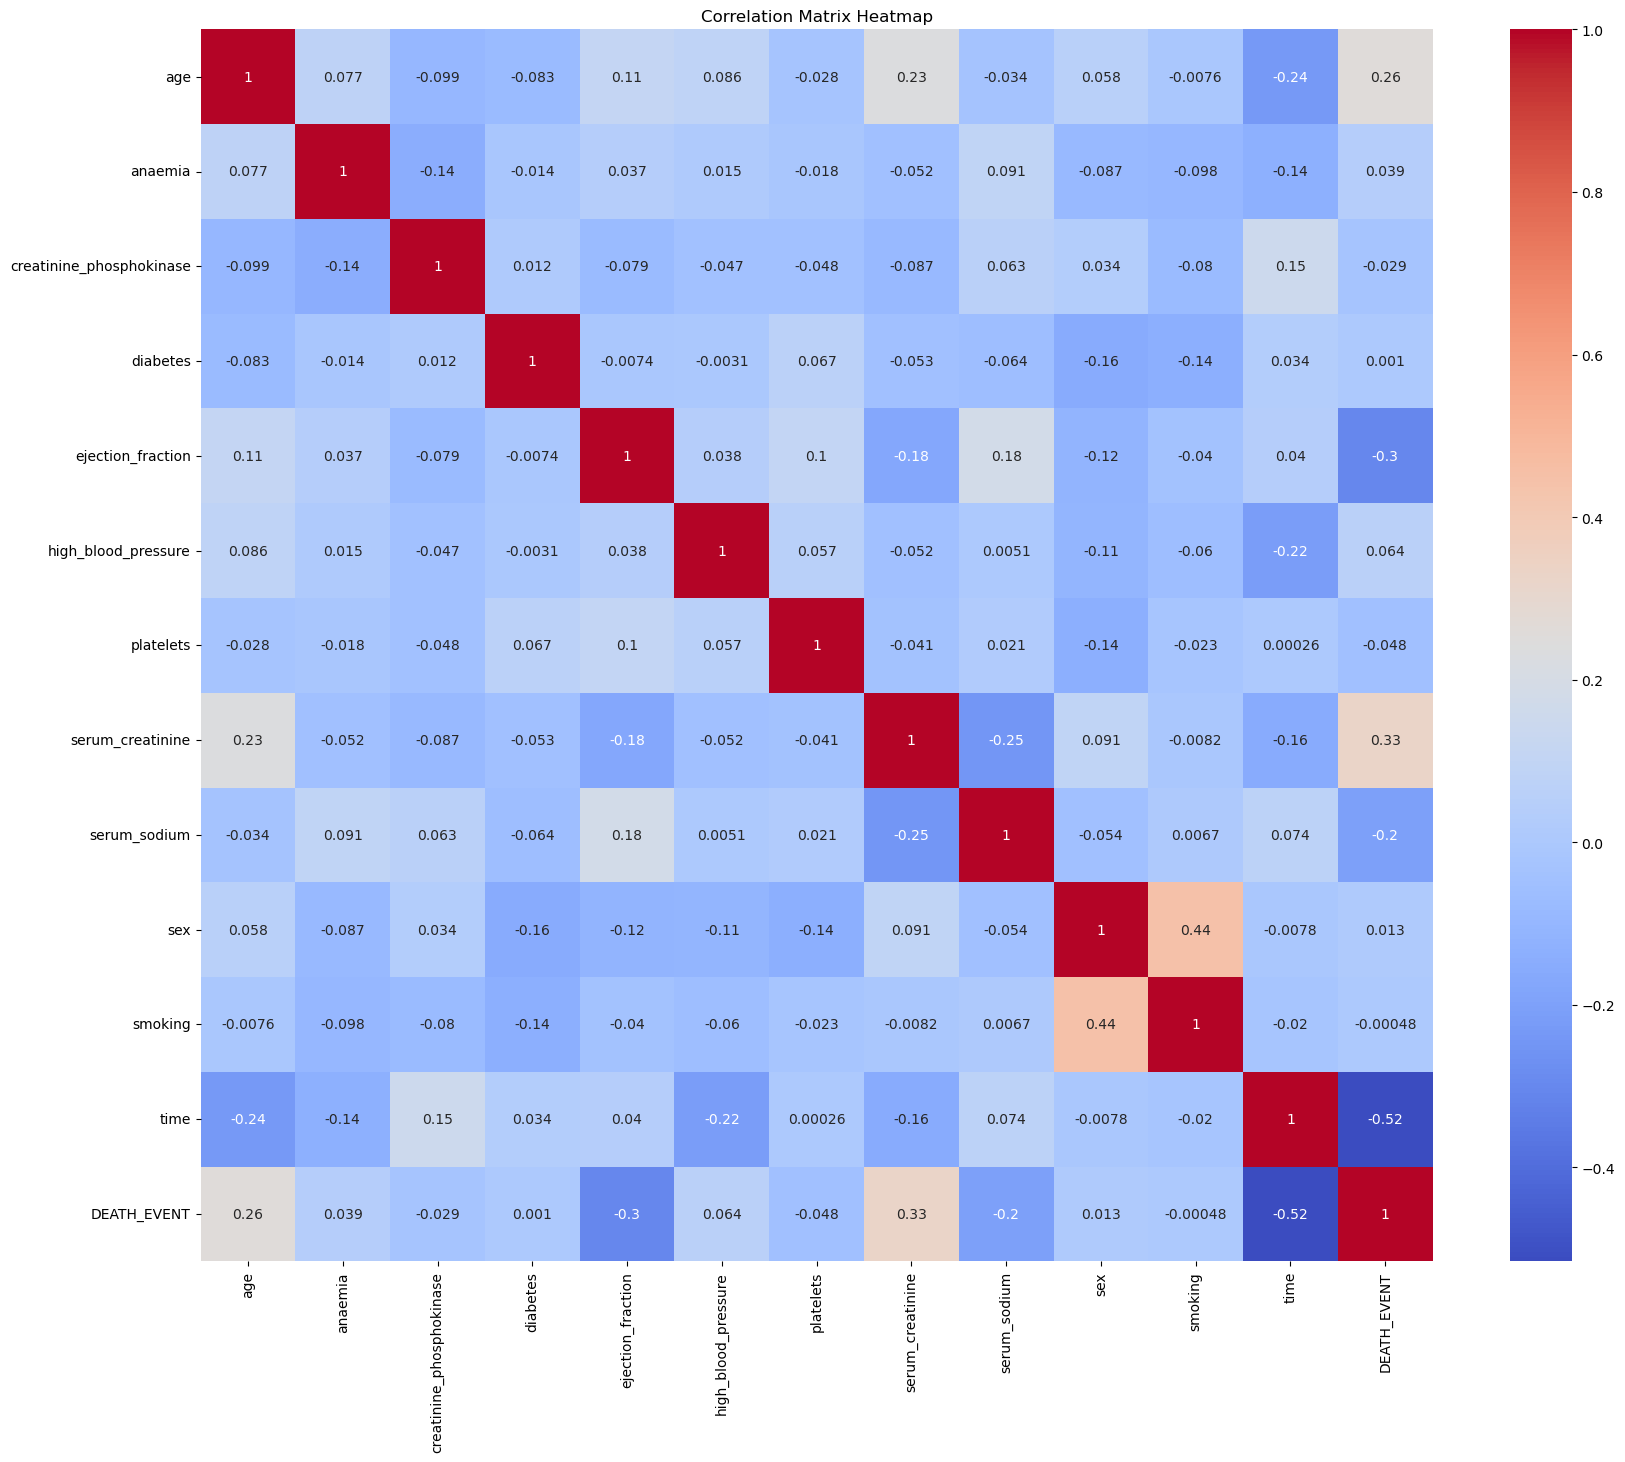

In [23]:
#checking colinearity between variables

corr_matrix = df.corr()

plt.figure(figsize=(20,16)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

**No pair of variables is highly correlated**

# Diving data into train and test set

In [24]:
x = df.drop("DEATH_EVENT",axis=1)
y = df['DEATH_EVENT']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape, y_train.shape

((224, 12), (224,))

In [27]:
X_test.shape, y_test.shape

((56, 12), (56,))

# Feature Scaling

In [28]:
#checking which variables needs scaling

for column in X_train.columns:
    unique_values = df[column].unique()
    
    print(f"Column: {column}")
    print("Unique Values:")
    print(unique_values)
    print()

Column: age
Unique Values:
[75.    65.    50.    90.    60.    62.    45.    49.    82.    87.
 70.    68.    53.    80.    95.    94.    85.    69.    72.    51.
 57.    55.    42.    41.    58.    67.    79.    59.    44.    63.
 86.    66.    43.    46.    61.    52.    64.    40.    60.667 73.
 77.    78.    48.    47.    54.    56.   ]

Column: anaemia
Unique Values:
[0 1]

Column: creatinine_phosphokinase
Unique Values:
[ 582  146  111   47  246  315  157   81  231  981  168   80  379  149
  125   52  128  220   63  148  112  122   70   23  249  159   94   60
  855 2656  235  124  571  127  588 1380  553  129  577   91   69  260
  371   75  607  789  364  318  109   68  250  110  161  113  224   92
  102  203  336   76   55  280   78   84  115   66  897  154  144  133
  514   59  156   61  305  898   53  748 1876  936  369  143  754  400
   96  737  358  200  248  270 1808  719  193  646  281 1548  805  291
  482  943  185  132 1610 2261  233   30 1846  335   58  910   72  130
 2

In [29]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
95,58.0,1,133,0,60,1,219000.0,1.0,141,1,0,83
151,62.0,0,30,1,60,1,244000.0,0.9,139,1,0,117
200,63.0,1,1767,0,45,0,73000.0,0.7,137,1,0,186
7,60.0,1,315,1,60,0,454000.0,1.1,131,1,1,10
138,62.0,0,281,1,35,0,221000.0,1.0,136,0,0,108


**"age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time" needs scaling.**

**I decided to apply MinMaxScaler because many variables are not normally distributed and many variables are of boolean data type, meaning that the values inside these variables are either 0 or 1.**

In [30]:
#Applying standard scaler on train and test set

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

variables_to_scale = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", 
                      "time"]

X_train[variables_to_scale] = scaler.fit_transform(X_train[variables_to_scale])

X_test[variables_to_scale] = scaler.transform(X_test[variables_to_scale])

X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
95,0.327273,1,0.044018,0,0.958333,1,0.346774,0.128205,0.708333,1,0,0.281139
151,0.400000,0,0.002801,1,0.958333,1,0.397177,0.102564,0.625000,1,0,0.402135
200,0.418182,1,0.697879,0,0.645833,0,0.052419,0.051282,0.541667,1,0,0.647687
7,0.363636,1,0.116847,1,0.958333,0,0.820565,0.153846,0.291667,1,1,0.021352
138,0.400000,0,0.103241,1,0.437500,0,0.350806,0.128205,0.500000,0,0,0.370107


In [31]:
X_test.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
38,0.363636,0,1.053621,1,0.333333,0,0.520161,0.461538,0.541667,1,0,0.092527
120,0.363636,1,0.285714,0,0.958333,1,0.328629,0.256410,0.458333,1,1,0.323843
258,0.090909,1,0.017207,1,0.229167,0,0.375000,0.076923,0.458333,1,0,0.804270
277,0.545455,0,0.223689,1,0.500000,0,-0.044153,0.153846,0.666667,1,0,0.861210
168,0.454545,0,0.223689,1,0.541667,0,0.449597,0.128205,0.583333,0,0,0.483986


**Scaling successfully done.**

# Check for the class imbalance

In [32]:
df['DEATH_EVENT'].value_counts()

0    194
1     86
Name: DEATH_EVENT, dtype: int64

In [33]:
y_train.value_counts()

0    155
1     69
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:>

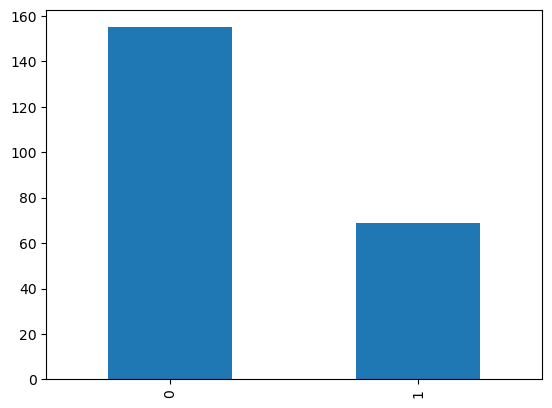

In [34]:
y_train.value_counts().plot(kind='bar')

In [35]:
#check the imbalance ratio

majority_count = 155
minority_count = 69

majority_ratio = majority_count / (minority_count + majority_count) * 100
minority_ratio = minority_count / (minority_count + majority_count) * 100

imbalance_ratio_str = f"{majority_ratio:.0f}:{minority_ratio:.0f}"
print(f"Imbalance Ratio: {imbalance_ratio_str}")

Imbalance Ratio: 69:31


**There is a major problem of class imabalace.**


# Handling Class Imbalance
**I have decided to apply only oversampling techniques because undersampling techniques lead to a loss of data. I will evaluate the results of these techniques on the random forest model and select the one that provides the best outcome.**

## (I) SMOTE (Synthetic Minority Over-sampling Technique)

In [36]:
# Applying Smote

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [37]:
#checking results of Smote

y_train_resampled.value_counts()

0    155
1    155
Name: DEATH_EVENT, dtype: int64

In [38]:
#check the performance on train data after applying Smote

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, precision_recall_fscore_support

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train_resampled, y_train_resampled)

y_train_pred = rf_classifier.predict(X_train_resampled)

classification_rep = classification_report(y_train_resampled, y_train_pred)
accuracy = accuracy_score(y_train_resampled, y_train_pred)
balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)
precision = precision_score(y_train_resampled, y_train_pred)
recall = recall_score(y_train_resampled, y_train_pred)
f1 = f1_score(y_train_resampled, y_train_pred)

print("Classification Report:")
print(classification_rep)
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       155

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310

Accuracy: 1.0
Balanced Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [39]:
#check the performance on test data after applying Smote

y_test_pred = rf_classifier.predict(X_test)

classification_rep = classification_report(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Classification Report:")
print(classification_rep)
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        39
           1       0.78      0.82      0.80        17

    accuracy                           0.88        56
   macro avg       0.85      0.86      0.85        56
weighted avg       0.88      0.88      0.88        56

Accuracy: 0.875
Balanced Accuracy: 0.8604826546003017
Precision: 0.7777777777777778
Recall: 0.8235294117647058
F1-score: 0.7999999999999999


## (II) ADASYN (Adaptive Synthetic Sampling)

In [40]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [41]:
#checking results of ADASYN

y_train_resampled.value_counts()

0    155
1    149
Name: DEATH_EVENT, dtype: int64

In [42]:
#check the performance on train data after applying ADASYN

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train_resampled, y_train_resampled)

y_train_pred = rf_classifier.predict(X_train_resampled)

classification_rep = classification_report(y_train_resampled, y_train_pred)
accuracy = accuracy_score(y_train_resampled, y_train_pred)
balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)
precision = precision_score(y_train_resampled, y_train_pred)
recall = recall_score(y_train_resampled, y_train_pred)
f1 = f1_score(y_train_resampled, y_train_pred)

print("Classification Report:")
print(classification_rep)
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       149

    accuracy                           1.00       304
   macro avg       1.00      1.00      1.00       304
weighted avg       1.00      1.00      1.00       304

Accuracy: 1.0
Balanced Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [43]:
#check the performance on test data after applying ADASYN

y_test_pred = rf_classifier.predict(X_test)

classification_rep = classification_report(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Classification Report:")
print(classification_rep)
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        39
           1       0.78      0.82      0.80        17

    accuracy                           0.88        56
   macro avg       0.85      0.86      0.85        56
weighted avg       0.88      0.88      0.88        56

Accuracy: 0.875
Balanced Accuracy: 0.8604826546003017
Precision: 0.7777777777777778
Recall: 0.8235294117647058
F1-score: 0.7999999999999999


**Both techniques provide almost the same results on the training and test sets, but I chose SMOTE because it is more efficient and produces less overfitting.**


**SMOTE is more efficient because it only creates new samples in the minority class, while ADASYN creates new samples in both the majority and minority classes. This can lead to ADASYN being slower than SMOTE, especially for large datasets.**


**SMOTE produces less overfitting because it does not create new samples that are too close to existing samples. ADASYN can create new samples that are too close to existing samples, which can lead to overfitting.**

In [44]:
#Applying Smote

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [45]:
y_train_resampled.value_counts()

0    155
1    155
Name: DEATH_EVENT, dtype: int64

# Feature Selection using Random Forest Feature Importance Method

In [46]:
#building random forest model for feature selection using X_train_resampled and y_train_resampled

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train_resampled, y_train_resampled)

importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_df

,Feature,Importance
0,time,0.297851
1,serum_creatinine,0.181093
2,ejection_fraction,0.147005
3,age,0.089830
4,serum_sodium,0.087982
5,platelets,0.071114
6,creatinine_phosphokinase,0.070122
7,anaemia,0.012241
8,smoking,0.012098
9,high_blood_pressure,0.011288


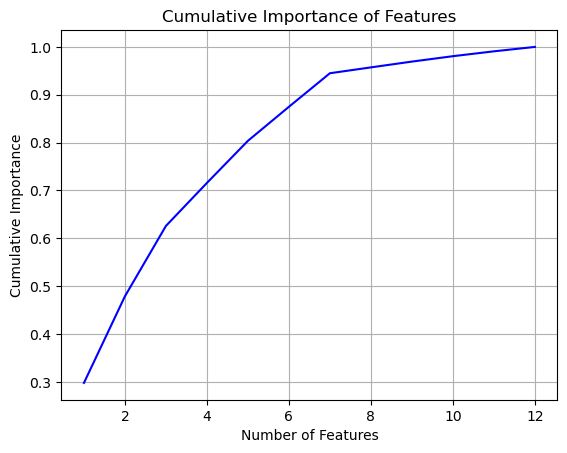

In [47]:
#check optimal number of features

sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()

**Seven variables contain approximately 95% of the importance of the dataset, while the remaining five variables only contain approximately 5% of the importance. However, I decided not to drop any variables, as they all seem to be important. The dataset is also small, and dropping any variables would mean losing information. I will build the model first, and if it overfits or does not provide good results, then I will drop the variables that are not so important and build the model again.**

# Check multi-colinearity between variables to avoid model from overfitting.

In [48]:
#checking multicolinearity of X_train_resampled

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X_train_resampled.columns
vif["VIF"] = [variance_inflation_factor(X_train_resampled.values, i) for i in range(X_train_resampled.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

vif

,Variable,VIF
8,serum_sodium,9.899637
6,platelets,6.668610
0,age,5.568704
4,ejection_fraction,5.415007
9,sex,3.847452
11,time,3.651729
7,serum_creatinine,3.064766
10,smoking,2.015367
2,creatinine_phosphokinase,1.936707
1,anaemia,1.906632


**Some Variables has high VIF Value, greater than 5. So, I decide to drop those variables one by one.**

In [49]:
X_train_resampled.drop('serum_sodium',axis=1,inplace=True)
X_test.drop('serum_sodium',axis=1,inplace=True)

In [50]:
vif = pd.DataFrame()
vif["Variable"] = X_train_resampled.columns
vif["VIF"] = [variance_inflation_factor(X_train_resampled.values, i) for i in range(X_train_resampled.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

vif

,Variable,VIF
6,platelets,6.336437
0,age,5.378902
4,ejection_fraction,4.851579
8,sex,3.786886
10,time,3.305779
7,serum_creatinine,3.060782
9,smoking,1.975413
2,creatinine_phosphokinase,1.833637
3,diabetes,1.787348
1,anaemia,1.781427


In [51]:
X_train_resampled.drop('platelets',axis=1,inplace=True)
X_test.drop('platelets',axis=1,inplace=True)

In [52]:
vif = pd.DataFrame()
vif["Variable"] = X_train_resampled.columns
vif["VIF"] = [variance_inflation_factor(X_train_resampled.values, i) for i in range(X_train_resampled.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

vif

,Variable,VIF
0,age,5.270517
4,ejection_fraction,4.401705
7,sex,3.772124
9,time,3.115610
6,serum_creatinine,2.933091
8,smoking,1.962751
2,creatinine_phosphokinase,1.795423
1,anaemia,1.751656
3,diabetes,1.692666
5,high_blood_pressure,1.600759


**All variables have VIF values under 5 except for the age variable. I decided not to drop it because death events happen according to age, and this variable is important for the analysis.**

In [53]:
#verifying the selected features sets

print("Shape of X_train_resampled:", X_train_resampled.shape)
print()
print("Shape of X_test:", X_test.shape)
print('-'*120)
print("Columns of X_train_resampled:", X_train_resampled.columns)
print()
print("Columns of X_test:", X_test.columns)

Shape of X_train_resampled: (310, 10)

Shape of X_test: (56, 10)
------------------------------------------------------------------------------------------------------------------------
Columns of X_train_resampled: Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'sex',
       'smoking', 'time'],
      dtype='object')

Columns of X_test: Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'sex',
       'smoking', 'time'],
      dtype='object')


**Feature selection is successfully done. Therefore, these are the selected features.**

# Model Building

In [54]:
#importing algorithms and time

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import time

In [55]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Balanced Accuracy': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train_resampled, y_train_resampled)
    y_train_pred = algorithm.predict(X_train_resampled)

    accuracy = accuracy_score(y_train_resampled, y_train_pred)
    precision = precision_score(y_train_resampled, y_train_pred, average='weighted')
    recall = recall_score(y_train_resampled, y_train_pred, average='weighted')
    f1 = f1_score(y_train_resampled, y_train_pred, average='weighted')
    balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Balanced Accuracy'].append(balanced_accuracy)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

,Algorithm,Accuracy,Precision,Recall,F1-score,Balanced Accuracy,Building Time (s)
0,LogisticRegression,0.819355,0.820690,0.819355,0.819167,0.819355,8.046276
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.015612
2,KNeighborsClassifier,0.809677,0.809690,0.809677,0.809675,0.809677,0.031242
3,GaussianNB,0.803226,0.803542,0.803226,0.803175,0.803226,0.000000
4,AdaBoostClassifier,0.954839,0.954839,0.954839,0.954839,0.954839,0.091943
5,GradientBoostingClassifier,0.996774,0.996795,0.996774,0.996774,0.996774,0.166465
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.167308
7,XGBClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.189228
8,SVC,0.880645,0.881933,0.880645,0.880544,0.880645,0.034956


In [56]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Balanced Accuracy': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

    results_test['Algorithm'].append(algorithm_name)
    results_test['Balanced Accuracy'].append(balanced_accuracy)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)
    

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test

,Algorithm,Accuracy,Precision,Recall,F1-score,Balanced Accuracy
0,LogisticRegression,0.892857,0.907823,0.892857,0.895600,0.906486
1,DecisionTreeClassifier,0.696429,0.701598,0.696429,0.698794,0.649321
2,KNeighborsClassifier,0.750000,0.742683,0.750000,0.745313,0.687783
3,GaussianNB,0.857143,0.873469,0.857143,0.860801,0.864253
4,AdaBoostClassifier,0.821429,0.817131,0.821429,0.818080,0.772247
5,GradientBoostingClassifier,0.857143,0.856121,0.857143,0.851103,0.797888
6,RandomForestClassifier,0.821429,0.817131,0.821429,0.818080,0.772247
7,XGBClassifier,0.839286,0.837054,0.839286,0.837868,0.801659
8,SVC,0.892857,0.892857,0.892857,0.892857,0.873303


**According to the problem statement, true negatives are more important to reduce than false positives, so the metric to focus on is recall.**

**I selected the SVC model because it does not overfit, whereas all other models overfit. The SVC model also performs well on both the training set and the test set, and it shows balanced performance across other metrics.**

# Build Ensembles of SVC

In [57]:
# Create base estimator (SVC) with OneVsOneClassifier
base_estimator = SVC(probability=True, random_state=42)

# Create Adaboost model using SVC as base estimator
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Create Gradient Boosting model using SVC as base estimator
gradient_boost_model = GradientBoostingClassifier(random_state=42)

# Create XGBoost model using SVC as base estimator
xgb_model = XGBClassifier(random_state=42)

# List of models
models = [adaboost_model, gradient_boost_model, xgb_model]
model_names = ['Adaboost', 'Gradient Boost', 'XGBoost']

# Initialize lists to store results
train_results = []
test_results = []

# Loop through each model
for model, model_name in zip(models, model_names):
    # Fit the model on resampled training data
    model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on train and test data
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics for train and test data
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_precision_recall_f1 = precision_recall_fscore_support(y_train_resampled, y_train_pred, average='binary')
    test_precision_recall_f1 = precision_recall_fscore_support(y_test, y_test_pred, average='binary')

    train_balanced_acc = balanced_accuracy_score(y_train_resampled, y_train_pred)
    test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)
    
    # Append results to the lists
    train_results.append([model_name, train_accuracy, train_precision_recall_f1[0], train_precision_recall_f1[1], train_balanced_acc])
    test_results.append([model_name, test_accuracy, test_precision_recall_f1[0], test_precision_recall_f1[1], test_balanced_acc])

# Create DataFrames to store the results
train_results_df = pd.DataFrame(train_results, columns=['Model', 'Train Accuracy', 'Train Precision', 'Train Recall', 'Train Balanced Accuracy'])
test_results_df = pd.DataFrame(test_results, columns=['Model', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test Balanced Accuracy'])

# Display the train and test results DataFrames
print("Train Results:")
train_results_df

Train Results:


,Model,Train Accuracy,Train Precision,Train Recall,Train Balanced Accuracy
0,Adaboost,0.912903,0.905063,0.922581,0.912903
1,Gradient Boost,0.996774,0.993590,1.000000,0.996774
2,XGBoost,1.000000,1.000000,1.000000,1.000000


In [58]:
print("\nTest Results:")
test_results_df


Test Results:


,Model,Test Accuracy,Test Precision,Test Recall,Test Balanced Accuracy
0,Adaboost,0.839286,0.722222,0.764706,0.818250
1,Gradient Boost,0.857143,0.846154,0.647059,0.797888
2,XGBoost,0.839286,0.750000,0.705882,0.801659


**All three of ensembles of SVC overfits.**

# Model Building Using Neural Network

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
# Define the neural network architecture

model = Sequential()


# Input layer with BatchNormalization and Activation (ReLU)
model.add(Dense(10, input_dim=10, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))


# First hidden layer with BatchNormalization, Activation (ReLU), and Dropout
model.add(Dense(10, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))  # 20% dropout


# Second hidden layer with BatchNormalization, Activation (ReLU), and Dropout
model.add(Dense(5, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))  # 10% dropout


# Output layer with Sigmoid activation
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

**For neural networks with ReLU activation functions, it is common to use a He initialization.**

**He initialization ensures that the weights are initialized in a way that allows the neural network to learn more quickly.**

In [61]:
# Define the EarlyStopping callback

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',         
    min_delta=0.00001,           
    patience=10,                 
    verbose=1,                   
    mode='auto',                 
    baseline=None,               
    restore_best_weights=False )

## Parameters of early stopping

**monitor**: The quantity to be monitored during training, typically a validation metric like 'val_loss' or 'val_accuracy'.

**patience**: Number of epochs with no improvement after which training will be stopped. For example, if patience=5, training will stop if the monitored quantity hasn't improved for 5 consecutive epochs.

**verbose**: Verbosity mode. Set to 1 to receive update messages during training when Early Stopping triggers.

**mode**: Determines when to stop. Set to 'min' if you're monitoring a loss (e.g., 'val_loss') and 'max' if you're monitoring a metric like accuracy.

**baseline**: If provided, training will stop if the monitored quantity is not better than this baseline value.

**restore_best_weights**: If True, the model's weights will be restored from the epoch with the best monitored value when training stops.

In [90]:
# Train the model

history = model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=10, validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/100
25/25 [==============================] - 1s 16ms/step - loss: 0.6319 - accuracy: 0.6411 - val_loss: 0.6884 - val_accuracy: 0.4355
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6309 - accuracy: 0.6815 - val_loss: 0.6862 - val_accuracy: 0.4516
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6203 - accuracy: 0.6734 - val_loss: 0.6796 - val_accuracy: 0.4677
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6003 - accuracy: 0.6734 - val_loss: 0.6804 - val_accuracy: 0.4677
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.5990 - accuracy: 0.6613 - val_loss: 0.6760 - val_accuracy: 0.4677
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.5914 - accuracy: 0.6815 - val_loss: 0.6709 - val_accuracy: 0.4677
Epoch 7/100
25/25 [==============================] - 1s 30ms/step - loss: 0.5857 - accuracy: 0.6774 - val_loss: 0.6756 - val_accuracy: 0.4677
Epoch 8/100

Epoch 59/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5205 - accuracy: 0.7500 - val_loss: 0.5498 - val_accuracy: 0.6129
Epoch 60/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4618 - accuracy: 0.7540 - val_loss: 0.5428 - val_accuracy: 0.6290
Epoch 61/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4735 - accuracy: 0.7702 - val_loss: 0.5391 - val_accuracy: 0.6452
Epoch 62/100
25/25 [==============================] - 0s 6ms/step - loss: 0.4727 - accuracy: 0.7460 - val_loss: 0.5337 - val_accuracy: 0.6774
Epoch 63/100
25/25 [==============================] - 0s 6ms/step - loss: 0.4739 - accuracy: 0.7298 - val_loss: 0.5277 - val_accuracy: 0.6935
Epoch 64/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4834 - accuracy: 0.7621 - val_loss: 0.5216 - val_accuracy: 0.7097
Epoch 65/100
25/25 [==============================] - 0s 6ms/step - loss: 0.4922 - accuracy: 0.7621 - val_loss: 0.5127 - val_accuracy: 0.7097
Epoch 


**The batch_size parameter in deep learning represents the number of training examples utilized in one forward/backward pass.**

**A larger batch size can improve the performance of the neural network, but it can also make the training process slower.**

**A smaller batch size can make the training process faster, but it can also lead to less accurate results.**

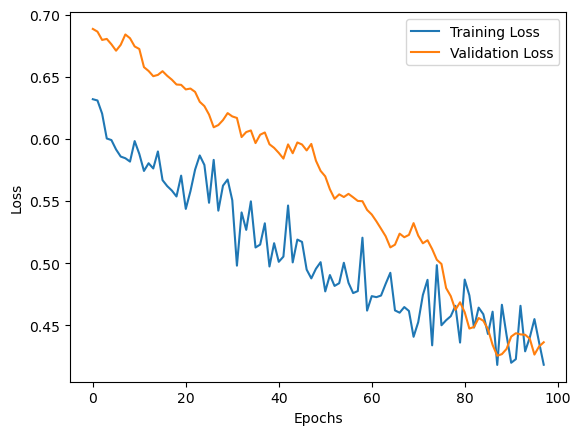

In [91]:
# Plotting the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

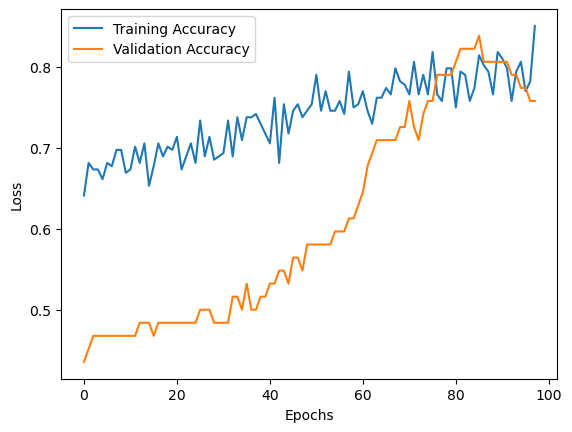

In [92]:
# Plotting the training and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [93]:
# Make predictions on train and test data using resampled data
y_train_pred_probs = model.predict(X_train_resampled)
y_train_pred = np.round(y_train_pred_probs)
y_test_pred_probs = model.predict(X_test)
y_test_pred = np.round(y_test_pred_probs)

# Calculate evaluation metrics on resampled train data
train_accuracy = model.evaluate(X_train_resampled, y_train_resampled, verbose=0)[1]
train_precision_recall_f1 = precision_recall_fscore_support(y_train_resampled, y_train_pred, average='binary')
train_classification_rep = classification_report(y_train_resampled, y_train_pred, target_names=['class_0', 'class_1'])
train_balanced_acc = balanced_accuracy_score(y_train_resampled, y_train_pred)

# Calculate evaluation metrics on test data
test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
test_precision_recall_f1 = precision_recall_fscore_support(y_test, y_test_pred, average='binary')
test_classification_rep = classification_report(y_test, y_test_pred, target_names=['class_0', 'class_1'])
test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

# Create a dataframe to display metrics
metrics_df = pd.DataFrame({
    'Dataset': ['Train (Resampled)', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_precision_recall_f1[0], test_precision_recall_f1[0]],
    'Recall': [train_precision_recall_f1[1], test_precision_recall_f1[1]],
    'F1-score': [train_precision_recall_f1[2], test_precision_recall_f1[2]],
    'Balanced Accuracy': [train_balanced_acc, test_balanced_acc]
})

# Display the dataframe
print("Metrics DataFrame:")
metrics_df

2/2 [==============================] - 0s 13ms/step
Metrics DataFrame:


,Dataset,Accuracy,Precision,Recall,F1-score,Balanced Accuracy
0,Train (Resampled),0.812903,0.834483,0.780645,0.806667,0.812903
1,Test,0.875000,0.812500,0.764706,0.787879,0.843891


In [94]:
# Print classification report separately
print("\nTrain Classification Report (Resampled Data):\n", train_classification_rep)
print("\nTest Classification Report:\n", test_classification_rep)


Train Classification Report (Resampled Data):
               precision    recall  f1-score   support

     class_0       0.79      0.85      0.82       155
     class_1       0.83      0.78      0.81       155

    accuracy                           0.81       310
   macro avg       0.81      0.81      0.81       310
weighted avg       0.81      0.81      0.81       310


Test Classification Report:
               precision    recall  f1-score   support

     class_0       0.90      0.92      0.91        39
     class_1       0.81      0.76      0.79        17

    accuracy                           0.88        56
   macro avg       0.86      0.84      0.85        56
weighted avg       0.87      0.88      0.87        56



**The ANN model provides a recall value of 0.780645 on the training set and 0.764706 on the test set. The Support Vector Classifier model performs better than the ANN model, with high recall value on both the training and test sets. Therefore, I decided to further work on the Support Vector Classifier model to improve its performance.**

# Hyperparameter Tunning

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

**C**: This is the regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error. A higher value of C will lead to a more complex model with a smaller margin, while a lower value of C will lead to a simpler model with a larger margin.


**kernel**: This parameter specifies the kernel type to be used in the algorithm. The kernel determines how the data is transformed into a higher-dimensional space to enable better separation. Common choices include 'linear', 'poly', 'rbf' (Radial Basis Function), and 'sigmoid'.


**gamma**: This parameter defines the kernel coefficient for 'rbf', 'poly', and 'sigmoid'. It controls the influence of individual training samples, with higher values leading to more complex decision boundaries.

In [68]:
svc_model = SVC()

grid_search = GridSearchCV(svc_model, param_grid, scoring='recall', cv=3, n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='recall')

In [69]:
# Get the best parameters and their values

best_params = grid_search.best_params_
best_recall = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Recall:", best_recall)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Recall: 0.9035947712418301


In [70]:
# Build model using best parameters 

svc_model = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=200, random_state=42)

svc_model.fit(X_train_resampled, y_train_resampled)  

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=200,
                           random_state=42)

In [71]:
# Make predictions on train and test data

y_train_pred = svc_model.predict(X_train_resampled)
y_test_pred = svc_model.predict(X_test)

# Calculate metrics for train and test data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision_recall_f1 = precision_recall_fscore_support(y_train_resampled, y_train_pred, average='binary')
test_precision_recall_f1 = precision_recall_fscore_support(y_test, y_test_pred, average='binary')

train_balanced_acc = balanced_accuracy_score(y_train_resampled, y_train_pred)
test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

# Create a DataFrame to store metrics
metrics_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_precision_recall_f1[0], test_precision_recall_f1[0]],
    'Recall': [train_precision_recall_f1[1], test_precision_recall_f1[1]],
    'F1-score': [train_precision_recall_f1[2], test_precision_recall_f1[2]],
    'Balanced Accuracy': [train_balanced_acc, test_balanced_acc]
}

metrics_df = pd.DataFrame(metrics_data)

# Display metrics DataFrame
print("Metrics DataFrame:")
metrics_df

Metrics DataFrame:


,Dataset,Accuracy,Precision,Recall,F1-score,Balanced Accuracy
0,Train,0.970968,0.967949,0.974194,0.971061,0.970968
1,Test,0.821429,0.705882,0.705882,0.705882,0.788839


In [72]:
# Print classification reports separately
print("\nTrain Classification Report:")
print(classification_report(y_train_resampled, y_train_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       155
           1       0.97      0.97      0.97       155

    accuracy                           0.97       310
   macro avg       0.97      0.97      0.97       310
weighted avg       0.97      0.97      0.97       310


Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        39
           1       0.71      0.71      0.71        17

    accuracy                           0.82        56
   macro avg       0.79      0.79      0.79        56
weighted avg       0.82      0.82      0.82        56



**The model built on the best hyperparameters overfits the data.**

**I tried many classification algorithms. Most of them overfit the data, except for SVC.**


**I then tried an ANN (neural network), but its performance was less than that of SVC.**


**I then tried ensembles of SVC, but all of them overfit the data.**


**I then tried hyperparameter tuning with SVC, but the model with the best hyperparameters also overfit the data.**


**Overfitting arose in the model due to the small amount of training data.**


**Therefore, I decided to choose SVC without hyperparameter tuning.**

# Build Final Model : SVC

In [73]:
svc_model = SVC(random_state=42, probability=True)

svc_model.fit(X_train_resampled, y_train_resampled)

SVC(probability=True, random_state=42)

In [74]:
# Predict on the train data
y_train_pred = svc_model.predict(X_train_resampled)

# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred, average='macro')
train_recall = recall_score(y_train_resampled, y_train_pred, average='macro')
train_f1_score = f1_score(y_train_resampled, y_train_pred, average='macro')

# Predict on the test data
y_test_pred = svc_model.predict(X_test)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1_score = f1_score(y_test, y_test_pred, average='macro')

# Create a DataFrame to store the evaluation metrics
metrics_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Balanced Accuracy': [train_balanced_accuracy, test_balanced_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1-score': [train_f1_score, test_f1_score]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Dataset,Accuracy,Balanced Accuracy,Precision,Recall,F1-score
0,Train,0.880645,0.880645,0.881933,0.880645,0.880544
1,Test,0.892857,0.873303,0.873303,0.873303,0.873303


# Finding Optimal Threshold

In [75]:
#creating a dataframe of probabilites, actual labels, predicted labels for genral check

probabilities = svc_model.predict_proba(X_train_resampled)

predicted_labels = svc_model.predict(X_train_resampled)

results = pd.DataFrame({'Probability': probabilities[:, 1],
                        'Actual_Label': y_train_resampled,
                        'Predicted_Label': predicted_labels})

results.sample(10)

,Probability,Actual_Label,Predicted_Label
167,0.041835,1,0
98,0.706400,0,1
134,0.052218,0,0
87,0.132661,1,0
220,0.667988,0,1
82,0.174106,0,0
234,0.580913,1,1
93,0.085392,0,0
31,0.103925,0,0
29,0.355133,0,0


In [76]:
#check evaulation metrics for different thresholds

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Creating an empty DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterating over the probability thresholds
for threshold in thresholds:
    # Converting probabilities to predicted labels based on the threshold
    predicted_labels = (probabilities[:, 1] >= threshold).astype(int)

    # Calculating evaluation metrics
    accuracy = accuracy_score(y_train_resampled, predicted_labels)
    balanced_accuracy = balanced_accuracy_score(y_train_resampled, predicted_labels)
    precision = precision_score(y_train_resampled, predicted_labels, zero_division=1)
    recall = recall_score(y_train_resampled, predicted_labels, zero_division=1)
    f1 = f1_score(y_train_resampled, predicted_labels, zero_division=1)

    # Adding the metrics to the DataFrame
    metrics_df = pd.concat([metrics_df, pd.DataFrame({'Probability': [threshold],
                                                      'Accuracy': [accuracy],
                                                      'Balanced Accuracy': [balanced_accuracy],
                                                      'Precision': [precision],
                                                      'Recall': [recall],
                                                      'F1 Score': [f1]})], ignore_index=True)
metrics_df

,Probability,Accuracy,Balanced Accuracy,Precision,Recall,F1 Score
0,0.1,0.667742,0.667742,0.601562,0.993548,0.749392
1,0.2,0.796774,0.796774,0.719048,0.974194,0.827397
2,0.3,0.841935,0.841935,0.781915,0.948387,0.857143
3,0.4,0.870968,0.870968,0.828571,0.935484,0.878788
4,0.5,0.874194,0.874194,0.858025,0.896774,0.876972
5,0.6,0.874194,0.874194,0.897260,0.845161,0.870432
6,0.7,0.864516,0.864516,0.937984,0.780645,0.852113
7,0.8,0.800000,0.800000,0.960396,0.625806,0.757812
8,0.9,0.596774,0.596774,1.000000,0.193548,0.324324
9,1.0,0.500000,0.500000,1.000000,0.000000,0.000000


In [77]:
max_recall_row = metrics_df.loc[metrics_df['Recall'].idxmax()]
max_recall_row

Probability          0.100000
Accuracy             0.667742
Balanced Accuracy    0.667742
Precision            0.601562
Recall               0.993548
F1 Score             0.749392
Name: 0, dtype: float64

## Check the Trade-Off Between Accuracy, Sensitivity, Specitivity, F-1 Score and Probabilities (Thresholds)

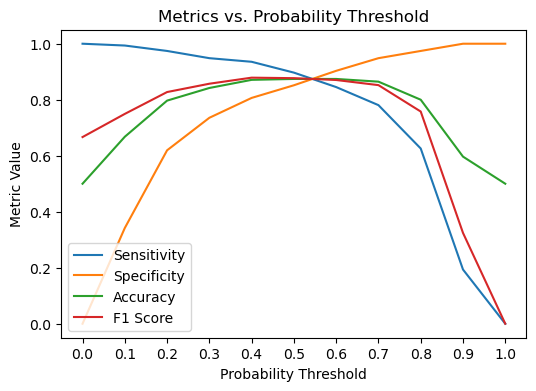

In [78]:
from sklearn.metrics import confusion_matrix

# Calculate predicted probabilities for the train data
train_probabilities = svc_model.predict_proba(X_train_resampled)[:, 1]

# Apply different thresholds to obtain binary predictions for train data
thresholds = np.arange(0, 1.1, 0.1)
sensitivity = []
specificity = []
accuracy = []
f1_scores = []

for threshold in thresholds:
    train_predictions = (train_probabilities >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train_resampled, train_predictions).ravel()
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))
    accuracy.append((tp + tn) / (tp + tn + fp + fn))
    f1_scores.append(f1_score(y_train_resampled, train_predictions))

# Plot the sensitivity, specificity, accuracy, and F1 score against probability thresholds
plt.figure(figsize=(6,4))
plt.plot(thresholds, sensitivity, label='Sensitivity')
plt.plot(thresholds, specificity, label='Specificity')
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Probability Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Metric Value')
plt.title('Metrics vs. Probability Threshold')
plt.legend(loc='lower left')
plt.show()

**It seems that best threshold is 0.54 because the accuracy, F1 score, specificity, and sensitivity are all stable in this range.**

# Evaulate Model on 0.54 as Threshold

## (I) Train & Test Data Metrics

In [79]:
#checking accuracy, precison, recall, f1 score

# Make predictions on training data
y_train_pred_probs = svc_model.predict_proba(X_train_resampled)[:, 1]
y_train_pred = np.where(y_train_pred_probs >= 0.54, 1, 0)

# Calculate evaluation metrics for training data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
train_f1_score = f1_score(y_train_resampled, y_train_pred)

# Make predictions on test data
y_test_pred_probs = svc_model.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_pred_probs >= 0.54, 1, 0)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)

# Create a dataframe to store the results
metrics_data = {
    'Metric': ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Training Data': [train_accuracy, train_balanced_accuracy, train_precision, train_recall, train_f1_score],
    'Test Data': [test_accuracy, test_balanced_accuracy, test_precision, test_recall, test_f1_score]
}
metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Metric,Training Data,Test Data
0,Accuracy,0.893548,0.910714
1,Balanced Accuracy,0.893548,0.886124
2,Precision,0.891026,0.875000
3,Recall,0.896774,0.823529
4,F1 Score,0.893891,0.848485


## (II) Confusion Matrix

In [81]:
from sklearn.metrics import confusion_matrix

# Calculate predictions for the training set using a threshold of 0.54
train_predictions = (svc_model.predict_proba(X_train_resampled)[:, 1] >= 0.54).astype(int)
train_confusion_matrix = confusion_matrix(y_train_resampled, train_predictions)

# Calculate predictions for the test set using a threshold of 0.54
test_predictions = (svc_model.predict_proba(X_test)[:, 1] >= 0.54).astype(int)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Calculate the total number of samples in each set
train_total = len(y_train_resampled)
test_total = len(y_test)

# Calculate the confusion matrix in percentage form for the training set
train_confusion_matrix_percent = train_confusion_matrix / train_total * 100

# Calculate the confusion matrix in percentage form for the test set
test_confusion_matrix_percent = test_confusion_matrix / test_total * 100

# Create a dataframe for the confusion matrix
confusion_matrix_df = pd.DataFrame({'Training Set': train_confusion_matrix_percent.flatten(),
                                    'Test Set': test_confusion_matrix_percent.flatten()},
                                   index=['True Positive (%)', 'True Negative (%)', 'False Positive (%)', 'False Negative (%)', ])
#
confusion_matrix_df

,Training Set,Test Set
True Positive (%),44.516129,66.071429
True Negative (%),5.483871,3.571429
False Positive (%),5.161290,5.357143
False Negative (%),44.838710,25.000000


## (III) ROC-AUC Curve

**The ROC-AUC curve is typically plotted using the predictions and true labels on the test data. This allows us to evaluate the performance of the model on unseen data and assess its ability to generalize.**

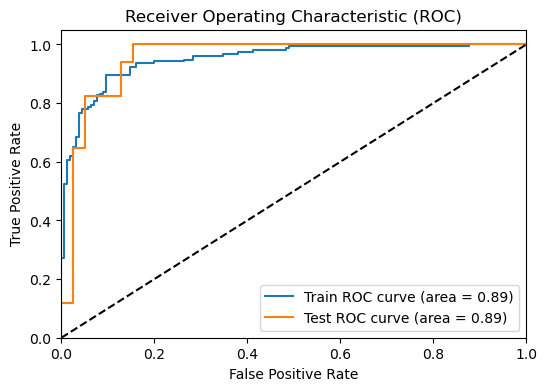

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate predicted probabilities for the train data
train_probabilities = svc_model.predict_proba(X_train_resampled)[:, 1]

# Apply the threshold of 0.54 to obtain binary predictions for train data
train_predictions = (train_probabilities >= 0.54).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resampled, train_probabilities)

# Calculate the ROC-AUC score for train data
roc_auc_train = roc_auc_score(y_train_resampled, train_predictions)

# Calculate predicted probabilities for the test data
test_probabilities = svc_model.predict_proba(X_test)[:, 1]

# Apply the threshold of 0.54 to obtain binary predictions for test data
test_predictions = (test_probabilities >= 0.54).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probabilities)

# Calculate the ROC-AUC score for test data
roc_auc_test = roc_auc_score(y_test, test_predictions)

# Plot the ROC curves
plt.figure(figsize=(6,4))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Evaulate model on 0.50 as threshold on test data

## (I) Train & Test Data Metrics

In [83]:
#checking accuracy, precison, recall, f1 score

# Make predictions on training data
y_train_pred_probs = svc_model.predict_proba(X_train_resampled)[:, 1]
y_train_pred = np.where(y_train_pred_probs >= 0.50, 1, 0)

# Calculate evaluation metrics for training data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
train_f1_score = f1_score(y_train_resampled, y_train_pred)

# Make predictions on test data
y_test_pred_probs = svc_model.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_pred_probs >= 0.50, 1, 0)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)

# Create a dataframe to store the results
metrics_data = {
    'Metric': ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Training Data': [train_accuracy, train_balanced_accuracy, train_precision, train_recall, train_f1_score],
    'Test Data': [test_accuracy, test_balanced_accuracy, test_precision, test_recall, test_f1_score]
}
metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Metric,Training Data,Test Data
0,Accuracy,0.874194,0.892857
1,Balanced Accuracy,0.874194,0.873303
2,Precision,0.858025,0.823529
3,Recall,0.896774,0.823529
4,F1 Score,0.876972,0.823529


## (II) Confusion Matrix

In [84]:
from sklearn.metrics import confusion_matrix

# Calculate predictions for the training set using a threshold of 0.50
train_predictions = (svc_model.predict_proba(X_train_resampled)[:, 1] >= 0.50).astype(int)
train_confusion_matrix = confusion_matrix(y_train_resampled, train_predictions)

# Calculate predictions for the test set using a threshold of 0.50
test_predictions = (svc_model.predict_proba(X_test)[:, 1] >= 0.50).astype(int)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Calculate the total number of samples in each set
train_total = len(y_train_resampled)
test_total = len(y_test)

# Calculate the confusion matrix in percentage form for the training set
train_confusion_matrix_percent = train_confusion_matrix / train_total * 100

# Calculate the confusion matrix in percentage form for the test set
test_confusion_matrix_percent = test_confusion_matrix / test_total * 100

# Create a dataframe for the confusion matrix
confusion_matrix_df = pd.DataFrame({'Training Set': train_confusion_matrix_percent.flatten(),
                                    'Test Set': test_confusion_matrix_percent.flatten()},
                                   index=['True Positive (%)', 'True Negative (%)', 'False Positive (%)', 'False Negative (%)', ])
#
confusion_matrix_df

,Training Set,Test Set
True Positive (%),42.580645,64.285714
True Negative (%),7.419355,5.357143
False Positive (%),5.161290,5.357143
False Negative (%),44.838710,25.000000


## (III) ROC-AUC Curve

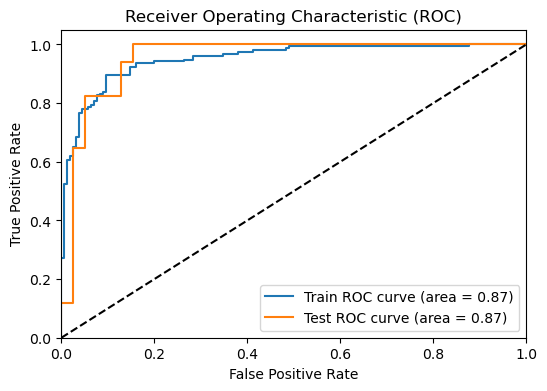

In [85]:
# Calculate predicted probabilities for the train data
train_probabilities = svc_model.predict_proba(X_train_resampled)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for train data
train_predictions = (train_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resampled, train_probabilities)

# Calculate the ROC-AUC score for train data
roc_auc_train = roc_auc_score(y_train_resampled, train_predictions)

# Calculate predicted probabilities for the test data
test_probabilities = svc_model.predict_proba(X_test)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for test data
test_predictions = (test_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probabilities)

# Calculate the ROC-AUC score for test data
roc_auc_test = roc_auc_score(y_test, test_predictions)

# Plot the ROC curves
plt.figure(figsize=(6,4))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Cross Validation

In [86]:
#cross validation of F-1 Score 

from sklearn.model_selection import cross_val_score

scores = cross_val_score(svc_model, X_train_resampled, y_train_resampled, cv=5, scoring='recall',n_jobs=-1)

print("Cross-Validation Scores (Recall):", scores)
print()
print("Mean Recall Score:", scores.mean())

Cross-Validation Scores (Recall): [0.61290323 0.90322581 0.96774194 0.93548387 0.93548387]

Mean Recall Score: 0.8709677419354838


In [87]:
#cross validation of Recall

scores = cross_val_score(svc_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy',n_jobs=-1)

print("Cross-Validation Scores (Accuracy):", scores)
print()
print("Mean Accuracy Score:", scores.mean())

Cross-Validation Scores (Accuracy): [0.66129032 0.83870968 0.90322581 0.85483871 0.87096774]

Mean Accuracy Score: 0.8258064516129032


# Important features in Model Building



In [88]:
feature_importance_df

,Feature,Importance
0,time,0.297851
1,serum_creatinine,0.181093
2,ejection_fraction,0.147005
3,age,0.089830
4,serum_sodium,0.087982
5,platelets,0.071114
6,creatinine_phosphokinase,0.070122
7,anaemia,0.012241
8,smoking,0.012098
9,high_blood_pressure,0.011288


**These seven variables ['time', 'serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium', 'platelets', 'creatinine_phosphokinase'] collectively contribute to about 94.6% of the overall predictive power of the model, which suggests that the model heavily relies on these features to make accurate predictions on the target variable.**

# Save the model to a file

In [89]:
import joblib


joblib.dump(svc_model, 'Heart Failure Predictor')

['Heart Failure Predictor']

# Project Report: Heart Failure Prediction

# 1. Introduction

**Background**

Heart failure is a serious medical condition that poses significant health risks to individuals. Early detection and prediction of heart failure are essential for timely medical interventions and improved patient outcomes. The project focuses on developing a predictive model using data science and machine learning techniques to accurately identify patients at risk of heart failure.

**Problem Statement**

The goal of this project is to build a predictive model that can identify individuals at risk of heart failure based on clinical and demographic features. This model can assist healthcare professionals in providing personalized care to patients and enhancing early detection of potential heart failure cases.

**Objective**

The primary objective of this project is to create a reliable and accurate predictive model for heart failure. Key steps involve data exploration, preprocessing, feature selection, model building, hyperparameter tuning, and performance evaluation.

**2. Data Exploration and Preprocessing**

**Dataset Overview**

The dataset contains 299 records and 13 columns, including features such as age, anaemia, creatinine phosphokinase, diabetes, ejection fraction, high blood pressure, platelets, serum creatinine, serum sodium, sex, smoking, time, and the target variable "DEATH_EVENT."

**Data Summary and Insights**
The dataset has been thoroughly explored and analyzed:

* Statistical summary of features
* Correlation analysis of variables
* Detection and handling of outliers
* Distribution analysis of continuous variables
* Assessment of multicollinearity

**3. Feature Selection**

Correlation analysis and feature importance techniques helped identify key features for model building. The optimal subset of features was selected to retain essential predictive power while avoiding overfitting.

**4. Data Splitting and Scaling**

The data was split into training and testing sets (80:20) to enable model evaluation. MinMax scaling was applied to ensure features were on the same scale, promoting convergence during model training.

**5. Handling Class Imbalance**

Due to class imbalance, the minority class was oversampled using the Synthetic Minority Over-sampling Technique (SMOTE) to enhance model performance.

**6. Model Building and Evaluation**

A variety of classification algorithms were evaluated, including Logistic Regression, Decision Tree, K-Nearest Neighbors, Gaussian Naive Bayes, AdaBoost, Gradient Boosting, Random Forest, XGBoost, and Support Vector Classifier (SVC). Model performance was assessed using metrics such as accuracy, precision, recall, F1-score, and balanced accuracy.

**7. Hyperparameter Tuning**

Hyperparameter tuning was performed on the SVC model to optimize its performance. GridSearchCV was used to find the best combination of hyperparameters.

**8. Model Selection and Validation**
The Support Vector Classifier (SVC) was selected as the final model due to its robust performance and ability to handle imbalanced datasets. The model's performance was validated on both training and test sets.

**9. Performance Analysis**
The model's performance was thoroughly analyzed, including metrics such as accuracy, balanced accuracy, precision, recall, F1-score, and ROC-AUC curves. Cross-validation results provided insight into the model's consistency.

**10. Feature Insights**

The importance of individual features in the model was analyzed, highlighting the most significant variables that contribute to accurate predictions.

**11. Conclusion**

The project successfully developed a predictive model for heart failure detection. The chosen SVC model demonstrated robust performance, effectively balancing accuracy and recall. Insights gained from feature analysis further reinforced the importance of certain variables in predicting heart failure.

**12. Project Documentation and Deployment**

The final trained model was saved as a pickle file for easy access and deployment. Recommendations were provided for deploying the model in a real-world healthcare setting.

In conclusion, the Heart Failure Prediction project leverages data science and machine learning techniques to build a predictive model that enhances early detection and intervention for heart failure patients. The project demonstrates the power of data-driven decision-making in healthcare, showcasing the potential to save lives and improve patient outcomes.